# Machine Learning - Regressions


## Table of content

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pre">Data PreProcessing</a></li>
<li><a href="#lr">Linear Regression</a></li>
<li><a href="#mlr">Multi Linear Regression</a></li>
<li><a href="#scale">Feature Scaling</a></li>
<li><a href="#svr">Support Vector Regression</a></li>
<li><a href="#dtr">Decision Tress Regression</a></li>
<li><a href="#rfr">Random Forest Regression</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The National Health and Nutrition Examination Survey (NHANES) dataset contains information to aid assess the health and nutritional status of adults and children in the United States with 20293 observations and 78 Varaibles. The survey combines interviews and physical examinations which include demographic, socioeconomic, dietary, and health-related questions.
I will investigate the data and use multiple regression models to predict the "Weight" of the captured population using a few variables of interest. 


### Aim and Objective


    1. To determine the best predictors for weight (both numerical and categorical)
    2. To determin the best regression model for predicting weight

### Loading packages, pandas, numpy, matplptlib etc

In [1]:
#base modules
import numpy as np
import pandas as pd

#visualization modules
from matplotlib import pyplot as plt
import seaborn as sns

<a id='pre'></a>
### Data PreProcessing

In [6]:
#import dataset
nhanes = pd.read_csv("datasets/nhanes.csv")
nhanes.head()

ID SurveyYr  Gender  Age  AgeMonths  Race1 Race3    Education  \
0  51624  2009_10    male   34      409.0  White   NaN  High School   
1  51625  2009_10    male    4       49.0  Other   NaN          NaN   
2  51626  2009_10    male   16      202.0  Black   NaN          NaN   
3  51627  2009_10    male   10      131.0  Black   NaN          NaN   
4  51628  2009_10  female   60      722.0  Black   NaN  High School   

  MaritalStatus     HHIncome  ...  SexAge  SexNumPartnLife  SexNumPartYear  \
0       Married  25000-34999  ...    16.0              8.0             1.0   
1           NaN  20000-24999  ...     NaN              NaN             NaN   
2           NaN  45000-54999  ...     NaN              NaN             NaN   
3           NaN  20000-24999  ...     NaN              NaN             NaN   
4       Widowed  10000-14999  ...    15.0              4.0             NaN   

  SameSex SexOrientation     WTINT2YR     WTMEC2YR  SDMVPSU  SDMVSTRA  \
0      No   Heterosexual  80100.54351  81528.77201        1        83   
1     NaN            NaN  53901.10429  56995.03543        2        79   
2     NaN            NaN  13953.07834  14509.27886        1        84   
3     NaN            NaN  11664.89940  12041.63537        2        86   
4      No            NaN  20090.33926  21000.33872        2        75   

   PregnantNow  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 78 columns]

In [14]:
#checking the 78 column names
nhanes.columns

Index(['ID', 'SurveyYr', 'Gender', 'Age', 'AgeMonths', 'Race1', 'Race3',
       'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid', 'Poverty',
       'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length', 'HeadCirc',
       'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO', 'Pulse', 'BPSysAve',
       'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3',
       'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1',
       'UrineVol2', 'UrineFlow2', 'Diabetes', 'DiabetesAge', 'HealthGen',
       'DaysPhysHlthBad', 'DaysMentHlthBad', 'LittleInterest', 'Depressed',
       'nPregnancies', 'nBabies', 'Age1stBaby', 'SleepHrsNight',
       'SleepTrouble', 'PhysActive', 'PhysActiveDays', 'TVHrsDay',
       'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild', 'Alcohol12PlusYr',
       'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100', 'SmokeAge',
       'Marijuana', 'AgeFirstMarij', 'RegularMarij', 'AgeRegMarij',
       'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartn

In [44]:
#inspecting the data
print(nhanes.shape)
print(nhanes.info())

(20293, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20293 entries, 0 to 20292
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20293 non-null  int64  
 1   SurveyYr          20293 non-null  object 
 2   Gender            20293 non-null  object 
 3   Age               20293 non-null  int64  
 4   AgeMonths         10738 non-null  float64
 5   Race1             20293 non-null  object 
 6   Race3             9756 non-null   object 
 7   Education         11758 non-null  object 
 8   MaritalStatus     11767 non-null  object 
 9   HHIncome          18217 non-null  object 
 10  HHIncomeMid       18217 non-null  float64
 11  Poverty           18457 non-null  float64
 12  HomeRooms         20148 non-null  float64
 13  HomeOwn           20156 non-null  object 
 14  Work              13060 non-null  object 
 15  Weight            19405 non-null  float64
 16  Length            2285 non-n

In [16]:
# checcking for missingness
nhanes.isna().sum()

ID                 0
SurveyYr           0
Gender             0
Age                0
AgeMonths       9555
               ...  
WTINT2YR           0
WTMEC2YR           0
SDMVPSU            0
SDMVSTRA           0
PregnantNow    17680
Length: 78, dtype: int64

##### ploting missingness by data type (categorical and numerical)

<AxesSubplot:>

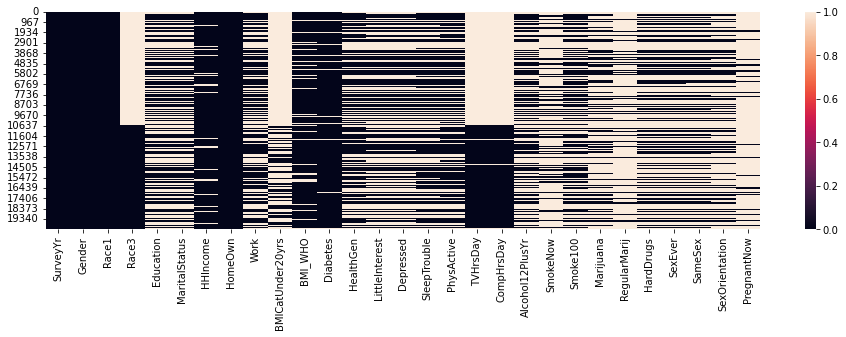

In [24]:
# categorical datatypes
cat_missing = nhanes.select_dtypes(exclude='number').isna()
plt.figure(figsize=(16, 4))
sns.heatmap(cat_missing)

# we have only four categorical variables with complete observations (SurveyYr, Gender, Race1 and HomeOwn)
# we can drop the missing values for variables with fewer missigness such as HHIncome, Diabetes
# Variables with highest missingness such as PregnantNow,RegularMarij, SmokeNow, BMICatUnder20Yrs etc can be dropped

<AxesSubplot:>

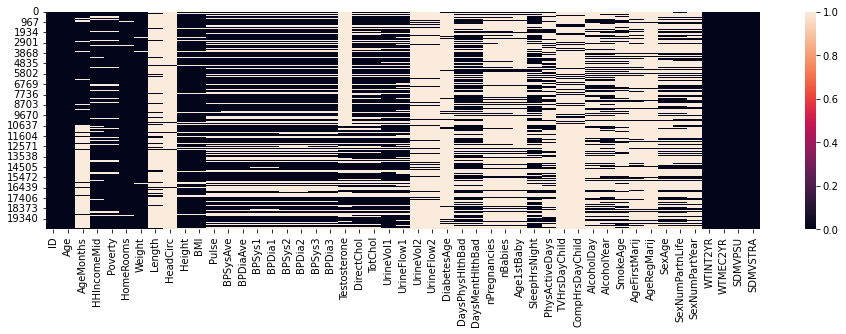

In [25]:
# numerical datatypes
num_missing = nhanes.select_dtypes(include='number').isna()
plt.figure(figsize=(16, 4))
sns.heatmap(num_missing)

#We see a few missingness in Weight, BMI,Height, HHIncome and high missingness in DiabetesAge,npregnacies, urinevol2 etc
#We can drop variables with high missingnes,
# for lower missingness we can input values like the mean value or drop only observations that contain missing values

In [113]:
nhanes.corr()

"""
although Length and HeadCirc have the strongest positive correlation with Weight,
they are limited as it is mainly for babies so we may consider 
droping that except we want to explore for babies
"""

ID       Age  AgeMonths  HHIncomeMid   Poverty  \
ID               1.000000 -0.018840  -0.181969     0.006889 -0.006945   
Age             -0.018840  1.000000   0.999926     0.001658  0.165797   
AgeMonths       -0.181969  0.999926   1.000000     0.036933  0.190807   
HHIncomeMid      0.006889  0.001658   0.036933     1.000000  0.906635   
Poverty         -0.006945  0.165797   0.190807     0.906635  1.000000   
HomeRooms       -0.041959  0.031366   0.051969     0.448474  0.389572   
Weight          -0.025193  0.626415   0.695017     0.034208  0.128450   
Length           0.019064  0.912124   0.948816     0.012396  0.017431   
HeadCirc         0.015304       NaN   0.784465     0.024958  0.053635   
Height          -0.014745  0.545593   0.567503     0.090701  0.164762   
BMI             -0.034107  0.497744   0.530020    -0.043463  0.038621   
Pulse            0.011023 -0.231919  -0.204523    -0.057565 -0.086723   
BPSysAve         0.014031  0.564916   0.548997    -0.075267  0.019264   
BPDiaAve         0.035343  0.272150   0.321164     0.032198  0.073322   
BPSys1          -0.002092  0.582377   0.569320    -0.082656  0.015863   
BPDia1           0.030012  0.305042   0.351108     0.020493  0.066317   
BPSys2           0.009125  0.563366   0.545726    -0.073954  0.020845   
BPDia2           0.032676  0.275319   0.320031     0.029200  0.069467   
BPSys3           0.013654  0.550666   0.533750    -0.075022  0.016037   
BPDia3           0.033260  0.256660   0.304530     0.033842  0.072453   
Testosterone    -0.002532  0.135355        NaN     0.023490  0.035835   
DirectChol       0.008959  0.033891   0.028993     0.079952  0.093165   
TotChol         -0.022035  0.332511   0.370808     0.023318  0.076203   
UrineVol1       -0.050218 -0.035481  -0.001579     0.046087  0.030736   
UrineFlow1       0.001520  0.038049   0.085112     0.062692  0.065106   
UrineVol2        0.037583  0.002678   0.041951     0.034573  0.037672   
UrineFlow2       0.023849 -0.043953  -0.062349     0.015699  0.005142   
DiabetesAge     -0.034736  0.706356   0.716831    -0.015735  0.069751   
DaysPhysHlthBad -0.036338  0.167523   0.164690    -0.115523 -0.088640   
DaysMentHlthBad -0.035490 -0.023069  -0.026552    -0.110529 -0.108852   
nPregnancies    -0.031597  0.231108   0.251098    -0.173405 -0.200579   
nBabies         -0.046566  0.326935   0.359153    -0.185496 -0.206828   
Age1stBaby       0.030480  0.052681   0.039085     0.347222  0.344579   
SleepHrsNight   -0.006349 -0.023812  -0.073878     0.015816  0.014094   
PhysActiveDays   0.008592  0.007774  -0.004955    -0.017995 -0.013524   
TVHrsDayChild    0.035916  0.023493   0.025310    -0.085454 -0.090667   
CompHrsDayChild -0.016649 -0.194700  -0.197843    -0.244580 -0.256348   
AlcoholDay      -0.019302 -0.239633  -0.245259    -0.147161 -0.194388   
AlcoholYear     -0.015752  0.059917   0.052387     0.124127  0.141969   
SmokeAge         0.004256  0.144406   0.154351     0.040858  0.076019   
AgeFirstMarij    0.056053  0.172961   0.190155     0.097260  0.109149   
AgeRegMarij      0.073585  0.217394   0.238130     0.080304  0.103926   
SexAge           0.015948  0.173986   0.196526     0.131018  0.147316   
SexNumPartnLife  0.023054  0.063692   0.062421    -0.037839 -0.016447   
SexNumPartYear   0.009002 -0.100373  -0.099979    -0.056856 -0.059002   
WTINT2YR         0.040545  0.204355   0.275667     0.314722  0.369941   
WTMEC2YR         0.039806  0.197939   0.268890     0.304691  0.357815   
SDMVPSU          0.059810 -0.019365  -0.017329    -0.038391 -0.046694   
SDMVSTRA         0.754897 -0.040426  -0.219035    -0.022171 -0.042107   

                 HomeRooms    Weight    Length  HeadCirc    Height  ...  \
ID               -0.041959 -0.025193  0.019064  0.015304 -0.014745  ...   
Age               0.031366  0.626415  0.912124       NaN  0.545593  ...   
AgeMonths         0.051969  0.695017  0.948816  0.784465  0.567503  ...   
HHIncomeMid       0.448474  0.034208  0.012396  0.024958  0.090701  ... 

<AxesSubplot:>

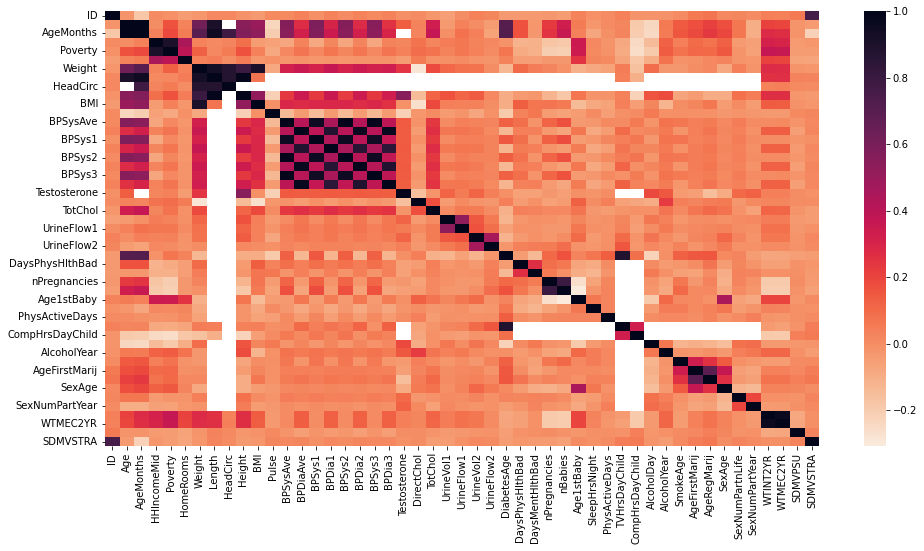

In [117]:
plt.figure(figsize=(16, 8))
sns.heatmap(nhanes.corr(),cmap=sns.cm.rocket_r)

In [31]:
nhanes.columns

Index(['ID', 'SurveyYr', 'Gender', 'Age', 'AgeMonths', 'Race1', 'Race3',
       'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid', 'Poverty',
       'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length', 'HeadCirc',
       'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO', 'Pulse', 'BPSysAve',
       'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3',
       'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1',
       'UrineVol2', 'UrineFlow2', 'Diabetes', 'DiabetesAge', 'HealthGen',
       'DaysPhysHlthBad', 'DaysMentHlthBad', 'LittleInterest', 'Depressed',
       'nPregnancies', 'nBabies', 'Age1stBaby', 'SleepHrsNight',
       'SleepTrouble', 'PhysActive', 'PhysActiveDays', 'TVHrsDay',
       'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild', 'Alcohol12PlusYr',
       'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100', 'SmokeAge',
       'Marijuana', 'AgeFirstMarij', 'RegularMarij', 'AgeRegMarij',
       'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartn

In [180]:
# from the above exploration, now let's first select our numerical variables of interest for our regression algorithms and remove any missinges
nhanes_reg = nhanes[['Weight','Age','HHIncomeMid','Poverty','Height', 'BMI','WTINT2YR', 'WTMEC2YR']]
nhanes_reg

Weight  Age  HHIncomeMid  Poverty  Height    BMI      WTINT2YR  \
0        87.4   34      30000.0     1.36   164.7  32.22  80100.543510   
1        17.0    4      22500.0     1.07   105.4  15.30  53901.104290   
2        72.3   16      50000.0     2.27   181.3  22.00  13953.078340   
3        39.8   10      22500.0     0.81   147.8  18.22  11664.899400   
4       116.8   60      12500.0     0.69   166.0  42.39  20090.339260   
...       ...  ...          ...      ...     ...    ...           ...   
20288    87.8   40      30000.0     1.73   177.3  27.90  19633.637050   
20289    56.5   18      87500.0     2.78   161.6  21.60   7382.152016   
20290    32.3   10      87500.0     2.63   148.1  14.70  60197.256540   
20291    78.4   60      70000.0     5.00   168.8  27.50  88961.259220   
20292    52.6   16      17500.0     0.79   164.4  19.50  24446.632090   

           WTMEC2YR  
0      81528.772010  
1      56995.035430  
2      14509.278860  
3      12041.635370  
4      21000.338720  
...             ...  
20288  20770.138120  
20289   8028.485773  
20290  63931.531990  
20291  91446.591980  
20292  24751.360190  

[20293 rows x 8 columns]

In [181]:
nhanes_reg.isna().sum()

Weight          888
Age               0
HHIncomeMid    2076
Poverty        1836
Height         2258
BMI            2279
WTINT2YR          0
WTMEC2YR          0
dtype: int64

In [183]:
#drop null values in the data
nhanes_reg.dropna(inplace=True)

In [185]:
print(nhanes_reg.shape)
print(nhanes_reg.isna().sum())
print(nhanes_reg.info())

# after dropping null values, we now have 16198 complete cases for our regression models 
# Next we start our regression

(16198, 8)
Weight         0
Age            0
HHIncomeMid    0
Poverty        0
Height         0
BMI            0
WTINT2YR       0
WTMEC2YR       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16198 entries, 0 to 20292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight       16198 non-null  float64
 1   Age          16198 non-null  int64  
 2   HHIncomeMid  16198 non-null  float64
 3   Poverty      16198 non-null  float64
 4   Height       16198 non-null  float64
 5   BMI          16198 non-null  float64
 6   WTINT2YR     16198 non-null  float64
 7   WTMEC2YR     16198 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.1 MB
None


<a id='lr'></a>

## 1. Linear Regressions 

###  Using scipy module for bivariate analysis of two numeric variables

In [102]:
#SciPy module
from scipy.stats import linregress

In [187]:
#Lets consider a simple linear regression with 2 variables -> weight and height
slope, intercept, rvalue, pvalue, stderr = linregress(y=nhanes_reg['Weight'], x=nhanes_reg['Height'])

In [188]:
print("The slope is", round(slope, 4)) #the m in the y=mx+c equation
print("The intercept is at", round(intercept, 4)) # the c in the y=mx+c equation
print("The correlation is", round(rvalue, 4)) # same as Pearsons Correlation Coefficient
print("The p-value is", round(pvalue, 4)) #lets us know if there is statistcal significance in the correlation and a value < 0.05 means there is significance



The slope is 1.005
The intercept is at -90.2017
The correlation is 0.7977
The p-value is 0.0


##### We could also explore all numeric correlations using pandas to examine how the correlate with weight
- This will help determine what we want to include in our model by carrying out some bivariate analysis with what we want to predict which is Weight  
- We can simply build a correlation matrix for the whole dataset and find those variables that have the strongest correlation preferrably R-squared to remove directionality with Weight
- Then visualize in a heatmap or clusterplot

In [189]:
nhanes_reg.corr()

# BMI, height and Age have the highest positive correlation with  weight
# Poverty, WTINT2YR and WTMEC2YR have low positive correlation with weight
# SDMVPSU,SDMVSTRA have low negative correlation with weight

Weight       Age  HHIncomeMid   Poverty    Height       BMI  \
Weight       1.000000  0.564215     0.024826  0.113783  0.797659  0.912439   
Age          0.564215  1.000000     0.000833  0.167044  0.550581  0.500846   
HHIncomeMid  0.024826  0.000833     1.000000  0.904517  0.091265 -0.043414   
Poverty      0.113783  0.167044     0.904517  1.000000  0.167352  0.036925   
Height       0.797659  0.550581     0.091265  0.167352  1.000000  0.523437   
BMI          0.912439  0.500846    -0.043414  0.036925  0.523437  1.000000   
WTINT2YR     0.226562  0.169172     0.320380  0.372722  0.274380  0.140326   
WTMEC2YR     0.223071  0.167987     0.317282  0.370353  0.270000  0.137858   

             WTINT2YR  WTMEC2YR  
Weight       0.226562  0.223071  
Age          0.169172  0.167987  
HHIncomeMid  0.320380  0.317282  
Poverty      0.372722  0.370353  
Height       0.274380  0.270000  
BMI          0.140326  0.137858  
WTINT2YR     1.000000  0.998561  
WTMEC2YR     0.998561  1.000000

<AxesSubplot:>

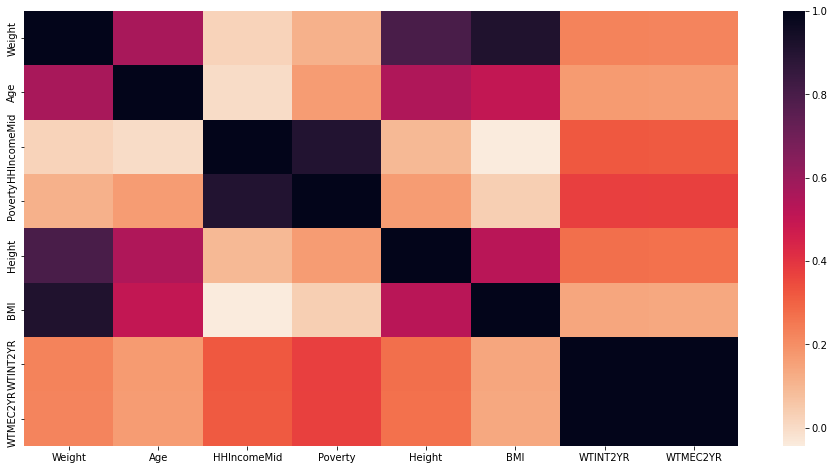

In [190]:
plt.figure(figsize=(16, 8))
sns.heatmap(nhanes_reg.corr(),cmap=sns.cm.rocket_r)

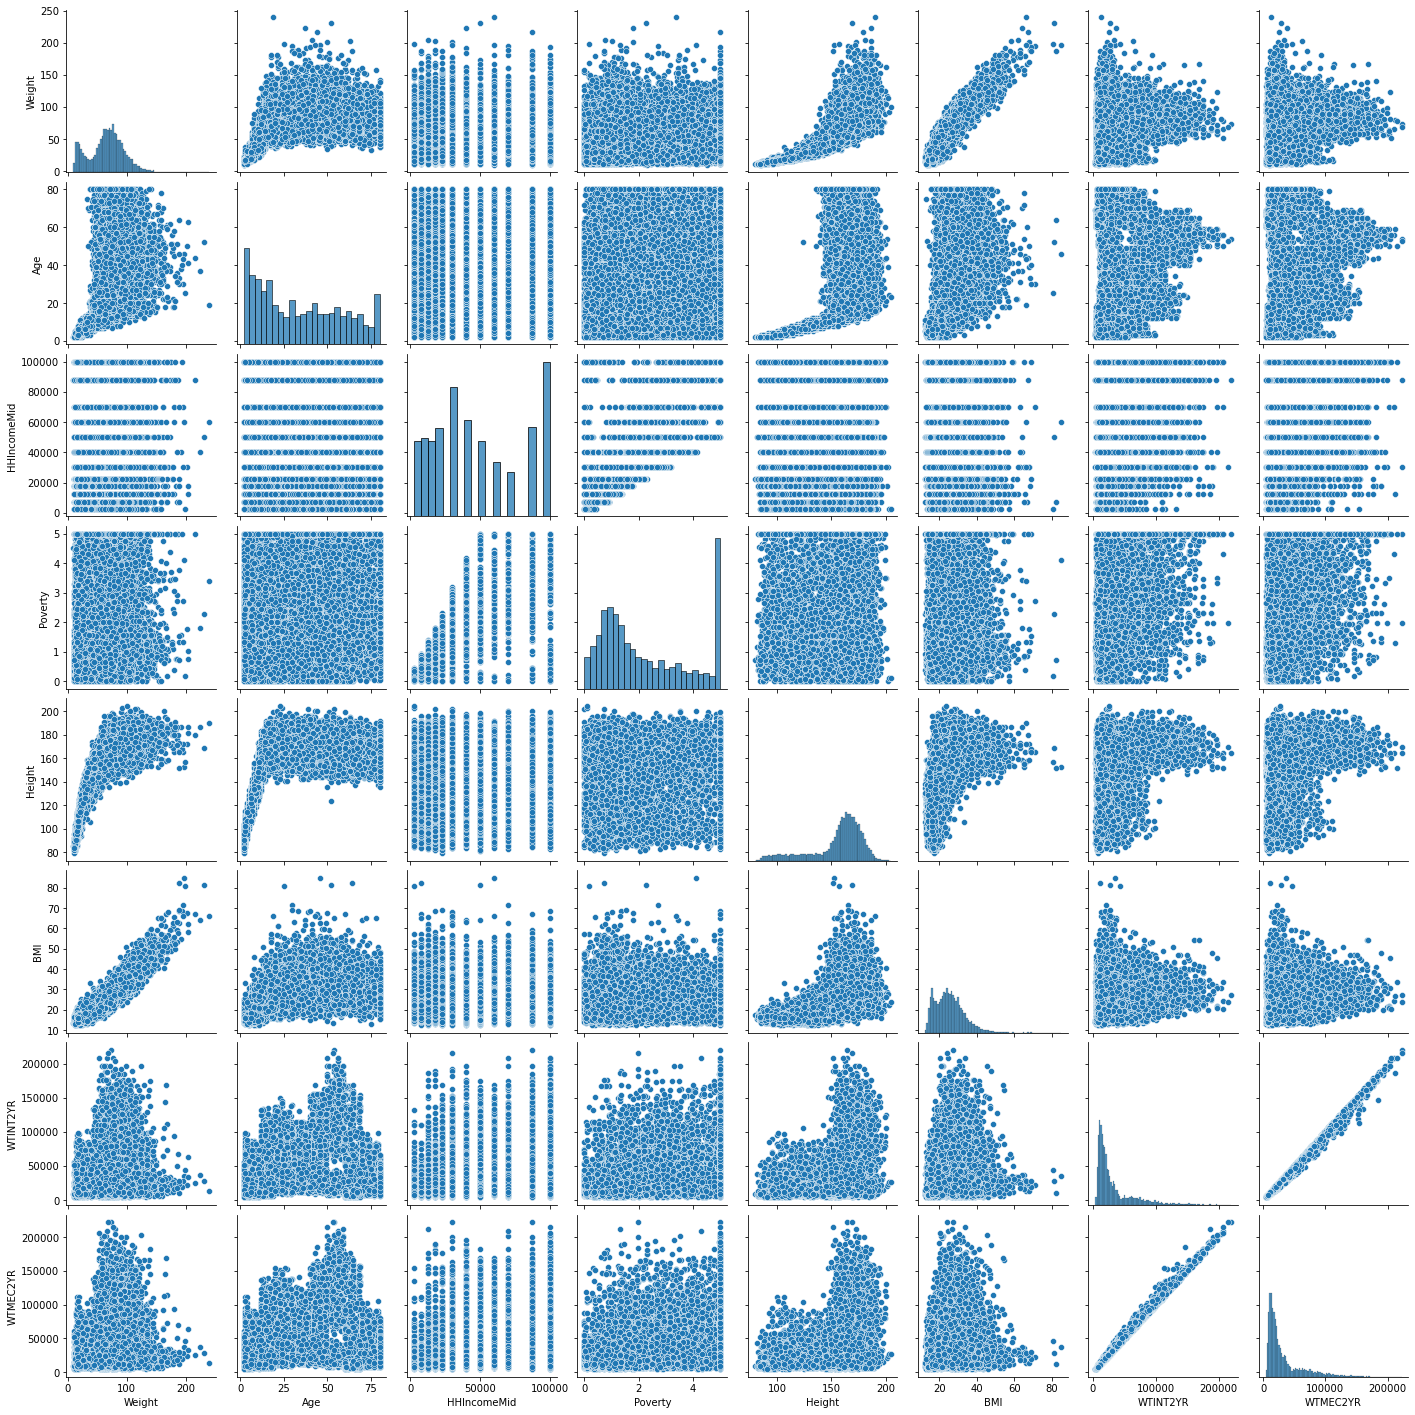

In [191]:
#we can next view a pair plot to see how they are related 

sns.pairplot(nhanes_reg.select_dtypes(include='number'))

#### Using the stats module

In [106]:
from statsmodels.formula.api import ols

In [192]:
# regression with weight and height to compare results from scipy.stats
regression = ols("Weight ~ Height", nhanes_reg).fit()

In [193]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:32   Log-Likelihood:                -69861.
No. Observations:               16198   AIC:                         1.397e+05
Df Residuals:                   16196   BIC:                         1.397e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.2017      0.942    -95.778      0.0

In [195]:
# Here we see the output corresponds to what we got from scipy.stats.linregress
# slope (Weight coeff) = 1.0050, 
# Intercept (Intercept coeff) = -90.2001
# Correlation R-squared =  0.797659**2 = 0.636 
# P-value = 0.000

<a id='mlr'></a>

## 2. Multi Linear Regression

### Using the stats module for more complex regressions
##### The advantage with statsmodels is it will allow us include more predictors!

In [196]:
#Next we build the model
regression2 = ols("Weight ~ Age + Height + BMI + HHIncomeMid + Poverty + WTINT2YR + WTMEC2YR", nhanes_reg).fit()

In [197]:
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 8.902e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:20:41   Log-Likelihood:                -48280.
No. Observations:               16198   AIC:                         9.658e+04
Df Residuals:                   16190   BIC:                         9.664e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -89.3400      0.274   -325.965      

In [26]:
# Here we see that the p-values for all coefficients are all significant and hence predictive
# We can also inteprete the regression result here by saying:
# For every unit increase in Age, Weight decreases by 0.0465 units
# For every unit increase in Height, Weight increases by 0.5674 units
# For every unit increase in BMI, Weight increases by 2.6590 units
# For every unit increase in Poverty, Weight increases by 0.6136 units etc

#### Including Non numeric variables in the regression
- Because regression algorithms only take numeric variables, categorical varialvles must be converted to some numeric form that can be pluged into an equation 
- This is done by converting to "dummy" variables 
- But first, we need to establish if there is some relationship 

In [27]:
#Lets look at the nhanes dataset again and lets consider Race1, Gender, Diabetes, HomeOwn, Depressed and SmokeNow
# Lets compare them visually

<AxesSubplot:xlabel='Race1', ylabel='Weight'>

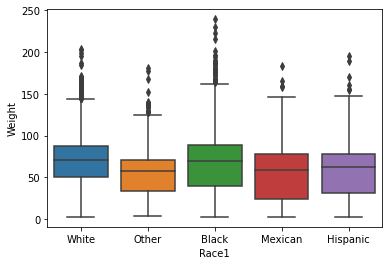

In [198]:
sns.boxplot(data=nhanes, y='Weight', x='Race1' ) #there is a difference in means so we keep this

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

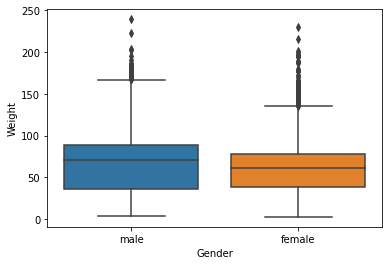

In [199]:
sns.boxplot(data=nhanes, y='Weight', x='Gender' ) #there is a difference in means so wwe keep this

<AxesSubplot:xlabel='Depressed', ylabel='Weight'>

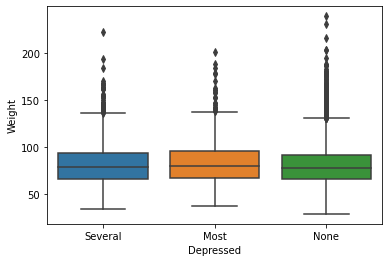

In [200]:
sns.boxplot(data=nhanes, y='Weight', x='Depressed' ) #there is no obvious difference in means so we dicard

<AxesSubplot:xlabel='SmokeNow', ylabel='Weight'>

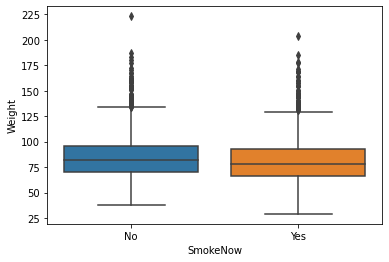

In [201]:
sns.boxplot(data=nhanes, y='Weight', x='SmokeNow' ) 
#there is a sligh difference in means, however when we checked the missingness during preprocessing, SmokeNow has over 15,000 missing values, so we will not consider it

<AxesSubplot:xlabel='Diabetes', ylabel='Weight'>

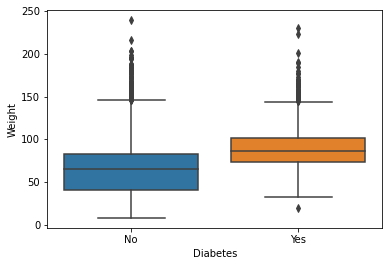

In [202]:
sns.boxplot(data=nhanes, y='Weight', x='Diabetes' ) #there is a significant difference in means so we keep this

<AxesSubplot:xlabel='HomeOwn', ylabel='Weight'>

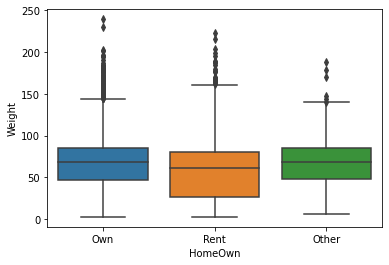

In [203]:
sns.boxplot(data=nhanes, y='Weight', x='HomeOwn' ) #there is a slight difference in means so this may not be a stong predictor

###### Next is convert each one to dummy variables

In [234]:
# lets select our numeric and categorical variables of interest
nhanes_nc = nhanes[['Weight','Age','HHIncomeMid','Poverty','Height', 'BMI','WTINT2YR', 'WTMEC2YR',\
                    'Gender','Race1','Diabetes']]
nhanes_nc

Weight  Age  HHIncomeMid  Poverty  Height    BMI      WTINT2YR  \
0        87.4   34      30000.0     1.36   164.7  32.22  80100.543510   
1        17.0    4      22500.0     1.07   105.4  15.30  53901.104290   
2        72.3   16      50000.0     2.27   181.3  22.00  13953.078340   
3        39.8   10      22500.0     0.81   147.8  18.22  11664.899400   
4       116.8   60      12500.0     0.69   166.0  42.39  20090.339260   
...       ...  ...          ...      ...     ...    ...           ...   
20288    87.8   40      30000.0     1.73   177.3  27.90  19633.637050   
20289    56.5   18      87500.0     2.78   161.6  21.60   7382.152016   
20290    32.3   10      87500.0     2.63   148.1  14.70  60197.256540   
20291    78.4   60      70000.0     5.00   168.8  27.50  88961.259220   
20292    52.6   16      17500.0     0.79   164.4  19.50  24446.632090   

           WTMEC2YR  Gender  Race1 Diabetes  
0      81528.772010    male  White       No  
1      56995.035430    male  Other       No  
2      14509.278860    male  Black       No  
3      12041.635370    male  Black       No  
4      21000.338720  female  Black      Yes  
...             ...     ...    ...      ...  
20288  20770.138120    male  White       No  
20289   8028.485773  female  Other       No  
20290  63931.531990  female  White       No  
20291  91446.591980    male  White      Yes  
20292  24751.360190    male  White       No  

[20293 rows x 11 columns]

In [236]:
nhanes_nc.dropna(inplace=True)

In [237]:
print(nhanes_nc.info())
print(nhanes_nc.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16192 entries, 0 to 20292
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight       16192 non-null  float64
 1   Age          16192 non-null  int64  
 2   HHIncomeMid  16192 non-null  float64
 3   Poverty      16192 non-null  float64
 4   Height       16192 non-null  float64
 5   BMI          16192 non-null  float64
 6   WTINT2YR     16192 non-null  float64
 7   WTMEC2YR     16192 non-null  float64
 8   Gender       16192 non-null  object 
 9   Race1        16192 non-null  object 
 10  Diabetes     16192 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1.5+ MB
None
Weight         0
Age            0
HHIncomeMid    0
Poverty        0
Height         0
BMI            0
WTINT2YR       0
WTMEC2YR       0
Gender         0
Race1          0
Diabetes       0
dtype: int64


In [238]:
#Rename Race1 to Race
nhanes_nc.rename(columns={'Race1':'Race'}, inplace=True)
nhanes_nc

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Weight  Age  HHIncomeMid  Poverty  Height    BMI      WTINT2YR  \
0        87.4   34      30000.0     1.36   164.7  32.22  80100.543510   
1        17.0    4      22500.0     1.07   105.4  15.30  53901.104290   
2        72.3   16      50000.0     2.27   181.3  22.00  13953.078340   
3        39.8   10      22500.0     0.81   147.8  18.22  11664.899400   
4       116.8   60      12500.0     0.69   166.0  42.39  20090.339260   
...       ...  ...          ...      ...     ...    ...           ...   
20288    87.8   40      30000.0     1.73   177.3  27.90  19633.637050   
20289    56.5   18      87500.0     2.78   161.6  21.60   7382.152016   
20290    32.3   10      87500.0     2.63   148.1  14.70  60197.256540   
20291    78.4   60      70000.0     5.00   168.8  27.50  88961.259220   
20292    52.6   16      17500.0     0.79   164.4  19.50  24446.632090   

           WTMEC2YR  Gender   Race Diabetes  
0      81528.772010    male  White       No  
1      56995.035430    male  Other       No  
2      14509.278860    male  Black       No  
3      12041.635370    male  Black       No  
4      21000.338720  female  Black      Yes  
...             ...     ...    ...      ...  
20288  20770.138120    male  White       No  
20289   8028.485773  female  Other       No  
20290  63931.531990  female  White       No  
20291  91446.591980    male  White      Yes  
20292  24751.360190    male  White       No  

[16192 rows x 11 columns]

In [239]:
#lets convert our categorical variables to dummy variable
nhanes_dummies = pd.get_dummies(nhanes_nc, drop_first=True)

In [240]:
nhanes_dummies

Weight  Age  HHIncomeMid  Poverty  Height    BMI      WTINT2YR  \
0        87.4   34      30000.0     1.36   164.7  32.22  80100.543510   
1        17.0    4      22500.0     1.07   105.4  15.30  53901.104290   
2        72.3   16      50000.0     2.27   181.3  22.00  13953.078340   
3        39.8   10      22500.0     0.81   147.8  18.22  11664.899400   
4       116.8   60      12500.0     0.69   166.0  42.39  20090.339260   
...       ...  ...          ...      ...     ...    ...           ...   
20288    87.8   40      30000.0     1.73   177.3  27.90  19633.637050   
20289    56.5   18      87500.0     2.78   161.6  21.60   7382.152016   
20290    32.3   10      87500.0     2.63   148.1  14.70  60197.256540   
20291    78.4   60      70000.0     5.00   168.8  27.50  88961.259220   
20292    52.6   16      17500.0     0.79   164.4  19.50  24446.632090   

           WTMEC2YR  Gender_male  Race_Hispanic  Race_Mexican  Race_Other  \
0      81528.772010            1              0             0           0   
1      56995.035430            1              0             0           1   
2      14509.278860            1              0             0           0   
3      12041.635370            1              0             0           0   
4      21000.338720            0              0             0           0   
...             ...          ...            ...           ...         ...   
20288  20770.138120            1              0             0           0   
20289   8028.485773            0              0             0           1   
20290  63931.531990            0              0             0           0   
20291  91446.591980            1              0             0           0   
20292  24751.360190            1              0             0           0   

       Race_White  Diabetes_Yes  
0               1             0  
1               0             0  
2               0             0  
3               0             0  
4               0             1  
...           ...           ...  
20288           1             0  
20289           0             0  
20290           1             0  
20291           1             1  
20292           1             0  

[16192 rows x 14 columns]

In [241]:
#we can now rename the columns
nhanes_dummies.rename(columns={'Race_Hispanic':'Hispanic', 'Race_Mexican':'Mexican', 'Race_Other': 'Other', 'Race_White':'White', 'Gender_male': 'Male',\
                        'Diabetes_Yes':'Diabetes'}, inplace=True)

In [242]:
nhanes_dummies

Weight  Age  HHIncomeMid  Poverty  Height    BMI      WTINT2YR  \
0        87.4   34      30000.0     1.36   164.7  32.22  80100.543510   
1        17.0    4      22500.0     1.07   105.4  15.30  53901.104290   
2        72.3   16      50000.0     2.27   181.3  22.00  13953.078340   
3        39.8   10      22500.0     0.81   147.8  18.22  11664.899400   
4       116.8   60      12500.0     0.69   166.0  42.39  20090.339260   
...       ...  ...          ...      ...     ...    ...           ...   
20288    87.8   40      30000.0     1.73   177.3  27.90  19633.637050   
20289    56.5   18      87500.0     2.78   161.6  21.60   7382.152016   
20290    32.3   10      87500.0     2.63   148.1  14.70  60197.256540   
20291    78.4   60      70000.0     5.00   168.8  27.50  88961.259220   
20292    52.6   16      17500.0     0.79   164.4  19.50  24446.632090   

           WTMEC2YR  Male  Hispanic  Mexican  Other  White  Diabetes  
0      81528.772010     1         0        0      0      1         0  
1      56995.035430     1         0        0      1      0         0  
2      14509.278860     1         0        0      0      0         0  
3      12041.635370     1         0        0      0      0         0  
4      21000.338720     0         0        0      0      0         1  
...             ...   ...       ...      ...    ...    ...       ...  
20288  20770.138120     1         0        0      0      1         0  
20289   8028.485773     0         0        0      1      0         0  
20290  63931.531990     0         0        0      0      1         0  
20291  91446.591980     1         0        0      0      1         1  
20292  24751.360190     1         0        0      0      1         0  

[16192 rows x 14 columns]

In [243]:
#Now we can plug into a regression equation and see how they impact on Weight
regression3 = ols("Weight ~ Age + Height + BMI + Hispanic + Mexican + White + Other + Male + Diabetes ", nhanes_dummies).fit()

In [244]:
print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 8.505e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:15:56   Log-Likelihood:                -46632.
No. Observations:               16192   AIC:                         9.328e+04
Df Residuals:                   16182   BIC:                         9.336e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.8488      0.256   -338.722      0.0

In [40]:
#True to our expectation they are all strongly predictive
# Interpertation
# For every unit increase in Age, Weight decreases by 0.035 units
# For every unit increase in Height, Weight increases by 0.5364 units
# For every unit increase in BMI, Weight increases by 2.7019 units
# Hispanics weigh 1.5804 less than Blacks
# Mexicans weigh 1.8674 less than Blacks
# Whites weigh 0.3479 more than Blacks
# Other races weigh 0.8943 less than Blacks
# Males weigh 4.0845 more than Females
# People with Diabetes weigh 0.3912 more than those without

### Using SKLearn module

#### Preprocessing
- First we will Separating the label from the features
- Then we will be scaling our features (independent varables) so as to normalize the variables range
- Import the module (from sklearn.model_selection import train_test_split)
- Then create the train test split

In [245]:
#Separating the label from the features
label = nhanes_dummies['Weight']
features = nhanes_dummies.drop('Weight', axis=1)

<a id='scale'></a>
### Feature Scaling

In [246]:
# import package
from sklearn.preprocessing import StandardScaler

In [247]:
scaler = StandardScaler()

In [248]:
scaled = scaler.fit(features)

In [249]:
scaled = scaler.transform(features)

In [250]:
nhanes_scaled = pd.DataFrame(scaled)

In [251]:
nhanes_scaled #this normalises are variable range, we will be using this in subsequent regression algorithms

0         1         2         3         4         5         6   \
0      0.000399 -0.551508 -0.556166  0.368757  0.843229  1.581724  1.550548   
1     -1.257049 -0.784342 -0.735051 -2.125532 -1.324914  0.715358  0.761279   
2     -0.754070  0.069381  0.005163  1.066990 -0.466371 -0.605647 -0.605520   
3     -1.005560 -0.784342 -0.895430 -0.342094 -0.950743 -0.681313 -0.684906   
4      1.090187 -1.094787 -0.969451  0.423438  2.146421 -0.402699 -0.396697   
...         ...       ...       ...       ...       ...       ...       ...   
16187  0.251888 -0.551508 -0.327933  0.898741  0.289660 -0.417802 -0.404103   
16188 -0.670240  1.233550  0.319753  0.238364 -0.517627 -0.822935 -0.814012   
16189 -1.005560  1.233550  0.227227 -0.329476 -1.401799  0.923560  0.984432   
16190  1.090187  0.690271  1.689148  0.541212  0.238404  1.874731  1.869612   
16191 -0.754070 -0.939565 -0.907767  0.356138 -0.786723 -0.258645 -0.276024   

             7         8         9         10        11        12  
0      1.004208 -0.335251 -0.453991 -0.353652  1.257139 -0.311598  
1      1.004208 -0.335251 -0.453991  2.827641 -0.795457 -0.311598  
2      1.004208 -0.335251 -0.453991 -0.353652 -0.795457 -0.311598  
3      1.004208 -0.335251 -0.453991 -0.353652 -0.795457 -0.311598  
4     -0.995809 -0.335251 -0.453991 -0.353652 -0.795457  3.209263  
...         ...       ...       ...       ...       ...       ...  
16187  1.004208 -0.335251 -0.453991 -0.353652  1.257139 -0.311598  
16188 -0.995809 -0.335251 -0.453991  2.827641 -0.795457 -0.311598  
16189 -0.995809 -0.335251 -0.453991 -0.353652  1.257139 -0.311598  
16190  1.004208 -0.335251 -0.453991 -0.353652  1.257139  3.209263  
16191  1.004208 -0.335251 -0.453991 -0.353652  1.257139 -0.311598  

[16192 rows x 13 columns]

In [252]:
#importing the needed module for splitting
from sklearn.model_selection import train_test_split

In [253]:
#creating the splits for training then test and validation
training_features, test_features, training_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=101)

In [255]:
#training pair
print(training_features.shape)
print(training_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(12953, 13)
(12953,)
(3239, 13)
(3239,)


#### Steps for  Multi Linear Regression Algorithm using sklearn
1. From the family import the algorithm (from sklearn.linear_model import LogisticRegresion)
2. Initialize the algorithm (mlr = LinearRegression)
3. Train the algorithm (mlr.fit(training_features, training_labels))
4. Predict! (predicted_labels = mlr.predict(test_features))
5. Check the accuracy of the model
- note that: Steps 3 to 5 may be iterative till we have a resonable fit(by creating a validation set)
- Now lets go!!

In [256]:
#import algorithm
from sklearn.linear_model import LinearRegression

In [257]:
#initialize the algorithm
regression4 = LinearRegression()

In [274]:
#train the model
regression4.fit(training_features, training_labels)

LinearRegression()

In [299]:
#predict
predicted_weight = regression4.predict(test_features)

In [276]:
predicted_weight

array([ 73.61174249,  18.23496756,  44.34569847, ..., 102.87214256,
        71.4105133 ,  18.35424705])

In [302]:
#convert predicted weight to a dataframe
predicted_weight=pd.DataFrame(predicted_weight)
predicted_weight.columns=['Predicted_weight']
predicted_weight

Predicted_weight
0            73.611742
1            18.234968
2            44.345698
3            13.892968
4            69.871105
...                ...
3234         98.359038
3235         96.090417
3236        102.872143
3237         71.410513
3238         18.354247

[3239 rows x 1 columns]

### Validating the model

In [306]:
#viewing our predicted and actual weight side by side
df=pd.concat([test_labels.reset_index(),predicted_weight,], axis=1).drop('index', axis=1)
df

Weight  Predicted_weight
0       73.7         73.611742
1       19.3         18.234968
2       44.5         44.345698
3       20.0         13.892968
4       66.5         69.871105
...      ...               ...
3234    94.9         98.359038
3235    93.7         96.090417
3236   105.2        102.872143
3237    69.6         71.410513
3238    16.9         18.354247

[3239 rows x 2 columns]

<AxesSubplot:xlabel='Predicted_weight', ylabel='Weight'>

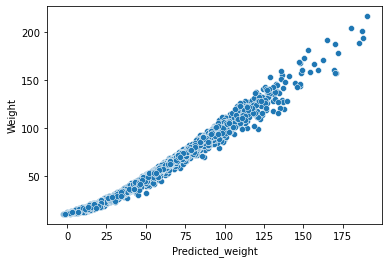

In [305]:
#Visual comparison
sns.scatterplot(y=df.Weight, x=df.Predicted_weight)
# this shows how very close our prediction is to the actual value

In [308]:
#using metrics - Root Mean Square Error to check the accuracy of the model
from sklearn import metrics

In [310]:
mean_square_error = metrics.mean_squared_error(predicted_weight, test_labels)

In [311]:
root_mean_square_error = np.sqrt(mean_square_error)

In [312]:
root_mean_square_error # this shows that the regression line is very close to the actual data points

4.3248322329271

<a id='svr'></a>
## 3. Support Vector Regression

In [313]:
from sklearn.svm import SVR

In [314]:
#instantiate
regression_svr = SVR()

In [315]:
#training the model
regression_svr.fit(training_features, training_labels)

SVR()

In [316]:
#predict
predicted_svr = regression_svr.predict(test_features)

In [317]:
predicted_svr

array([76.9657975 , 56.18350653, 77.43081041, ..., 61.35912491,
       80.51112391, 57.92568962])

In [320]:
pd.DataFrame(predicted_svr, test_labels).reset_index()

Weight          0
0       73.7  76.965797
1       19.3  56.183507
2       44.5  77.430810
3       20.0  74.462500
4       66.5  69.199258
...      ...        ...
3234    94.9  63.567339
3235    93.7  78.825761
3236   105.2  61.359125
3237    69.6  80.511124
3238    16.9  57.925690

[3239 rows x 2 columns]

<AxesSubplot:ylabel='Weight'>

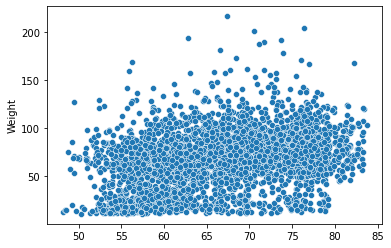

In [323]:
#Visual comparison
sns.scatterplot(x=predicted_svr,y=test_labels)

In [321]:
# measure 
mean_square_error = metrics.mean_squared_error(predicted_svr, test_labels)

root_mean_square_error = np.sqrt(mean_square_error)

root_mean_square_error 
# this shows that the regression line is very far from the actual data points,SVR may not be the best model for our prediction

28.45872957613079

<a id='dtc'></a>

## 4. Decision Tree Regression

In [324]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
regression_dtr = DecisionTreeRegressor()
regression_dtr.fit(training_features, training_labels)
predicted_dtr = regression_dtr.predict(test_features)

In [327]:
#compare predicted vs actual side by side
pd.DataFrame(predicted_dtr, test_labels).reset_index()

Weight      0
0       73.7   74.8
1       19.3   18.8
2       44.5   45.2
3       20.0   20.2
4       66.5   67.4
...      ...    ...
3234    94.9   95.2
3235    93.7   93.3
3236   105.2  104.9
3237    69.6   70.7
3238    16.9   16.6

[3239 rows x 2 columns]

<AxesSubplot:ylabel='Weight'>

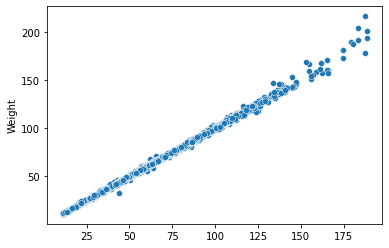

In [328]:
#Visual comparison
sns.scatterplot(x=predicted_dtr,y=test_labels)

In [329]:
#using metrics - Root Mean Square Error to check the accuracy of the model
mean_square_error = metrics.mean_squared_error(predicted_dtr, test_labels)

root_mean_square_error = np.sqrt(mean_square_error)

root_mean_square_error 

# DTR so far, shows the closest regression to the data points. This may be the best model for our prediction

1.2727740134879844

<a id='rfr'></a>
## 5. Random Forest Regression

In [332]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regression_rfr = RandomForestRegressor(n_estimators=100)
regression_rfr.fit(training_features, training_labels)
predicted_rfr = regression_rfr.predict(test_features)

In [336]:
pd.DataFrame(predicted_rfr)

0
0      73.895
1      19.394
2      44.722
3      19.998
4      66.419
...       ...
3234   94.752
3235   93.734
3236  104.968
3237   70.110
3238   17.114

[3239 rows x 1 columns]

In [341]:
# compare predicted vs actual side by side
pd.DataFrame(predicted_rfr,test_labels).reset_index()

Weight        0
0       73.7   73.895
1       19.3   19.394
2       44.5   44.722
3       20.0   19.998
4       66.5   66.419
...      ...      ...
3234    94.9   94.752
3235    93.7   93.734
3236   105.2  104.968
3237    69.6   70.110
3238    16.9   17.114

[3239 rows x 2 columns]

<AxesSubplot:ylabel='Weight'>

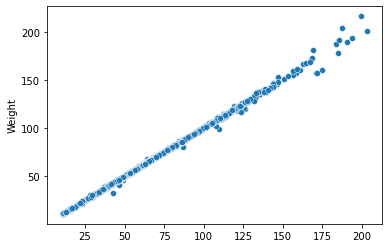

In [342]:
#Visual comparison
sns.scatterplot(x=predicted_rfr,y=test_labels)

In [343]:
#using metrics - Root Mean Square Error to check the accuracy of the model
mean_square_error = metrics.mean_squared_error(predicted_rfr, test_labels)

root_mean_square_error = np.sqrt(mean_square_error)

root_mean_square_error 

0.857201722732036

<a id='conclusions'></a>
## Conclusion


1. The best numerical predictors for weight are BMI, Height and Age, with p-values of 0.000 each and correlation of 0.911194, 0.796947 and 0.626415 respectively
2. The best categorical predictors are Race, Gender,and Diabetes, with Race, Gender having p-values of 0.000 and Diabetes at 0.002
3. Randsom Forest Regressor is the best regression model for predicting weight, with a mean square error of 0.8572 followed by Decision Tree Regressor with mean square error of 1.2728. Support Vector Regressor was the worst regression model for predicting weight with mean square error of 28.4587